In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import manifold
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 


pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("./dataset/CTU-13.csv")
df.iloc[0]

Flow Duration        9.011435e+06
Tot Fwd Pkts         5.000000e+00
Tot Bwd Pkts         1.000000e+00
TotLen Fwd Pkts      0.000000e+00
TotLen Bwd Pkts      0.000000e+00
Fwd Pkt Len Max      0.000000e+00
Fwd Pkt Len Min      0.000000e+00
Fwd Pkt Len Mean     0.000000e+00
Fwd Pkt Len Std      0.000000e+00
Bwd Pkt Len Max      0.000000e+00
Bwd Pkt Len Min      0.000000e+00
Bwd Pkt Len Mean     0.000000e+00
Bwd Pkt Len Std      0.000000e+00
Flow Byts/s          0.000000e+00
Flow Pkts/s          6.658207e-01
Flow IAT Mean        1.802287e+06
Flow IAT Std         2.686479e+06
Flow IAT Max         6.006895e+06
Flow IAT Min         6.000000e+00
Fwd IAT Tot          9.011429e+06
Fwd IAT Mean         2.252857e+06
Fwd IAT Std          2.875669e+06
Fwd IAT Max          6.006895e+06
Fwd IAT Min          1.100000e+01
Bwd IAT Tot          0.000000e+00
Bwd IAT Mean         0.000000e+00
Bwd IAT Std          0.000000e+00
Bwd IAT Max          0.000000e+00
Bwd IAT Min          0.000000e+00
Bwd PSH Flags 

### Feature stats understanding

In [3]:
df.describe(include="all")

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Bwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,ACK Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Init Bwd Win Byts,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,9.221200e+04,92212.000000,92212.000000,9.221200e+04,9.221200e+04,92212.000000,92212.000000,92212.000000,92212.000000,92212.000000,92212.000000,92212.000000,92212.000000,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,92212.000000,92212.000000,92212.000000,92212.000000,9.221200e+04,92212.000000,92212.000000,92212.000000,92212.000000,9.221200e+04,92212.000000,92212.000000,92212.000000,92212.000000,92212.000000,92212.000000,92212.000000,92212.000000,92212.000000,92212.000000,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,92212.000000
mean,1.070781e+07,10.943370,12.974233,5.600684e+03,1.021176e+04,77.677287,6.762699,22.974344,25.156811,221.865007,22.481749,99.433759,89.968386,1.138193e+05,2.648651e+04,1.225057e+06,1.699203e+06,5.367063e+06,3.965147e+05,9.401086e+06,1.430546e+06,1.658805e+06,4.536767e+06,3.934057e+05,7.604188e+06,8.657605e+05,1.201935e+06,3.161932e+06,1.070292e+05,0.021277,177.271331,224.765757,13102.720324,1.338379e+04,22.072171,235.485761,76.414598,81.657083,3.107399e+04,0.041556,0.317789,0.011853,0.210851,0.538531,94.179421,22.974344,99.433759,29989.415673,5.779454,4.351079e+05,7.777843e+04,5.598308e+05,3.854448e+05,3.928015e+06,4.906831e+05,4.354137e+06,3.542860e+06,0.421832
std,2.708038e+07,249.027375,188.163610,2.857600e+05,2.096956e+05,227.595074,33.400015,76.539275,81.240567,501.244678,37.663492,196.265739,180.314414,1.720914e+06,9.508670e+04,5.116283e+06,4.854940e+06,1.456884e+07,4.564766e+06,2.537665e+07,4.965779e+06,5.251308e+06,1.328856e+07,3.920732e+06,2.484887e+07,3.818965e+06,5.305884e+06,1.204175e+07,1.724857e+06,0.144307,3888.225818,3736.272499,47206.537896,4.864089e+04,32.892671,510.389706,129.526008,156.225411,1.272904e+05,0.199574,0.465620,0.108225,0.407915,0.925399,136.840824,76.539275,196.265739,32067.342713,204.037943,1.516574e+06,7.175262e+05,1.983055e+06,1.416148e+06,1.200553e+07,3.847780e+06,1.334522e+07,1.143824e+07,0.493855
min,1.000000e+00,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.694919e-02,1.000000e+00,0.000000e+00,1.000000e+00,-3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,8.333333e-03,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.182200e+04,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.547067e+00,1.958575e+04,0.000000e+00,2.159675e+04,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,16.000000,0.000000,7.766812e-01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00

### Datatypes understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92212 entries, 0 to 92211
Data columns (total 58 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow Duration      92212 non-null  int64  
 1   Tot Fwd Pkts       92212 non-null  int64  
 2   Tot Bwd Pkts       92212 non-null  int64  
 3   TotLen Fwd Pkts    92212 non-null  int64  
 4   TotLen Bwd Pkts    92212 non-null  int64  
 5   Fwd Pkt Len Max    92212 non-null  int64  
 6   Fwd Pkt Len Min    92212 non-null  int64  
 7   Fwd Pkt Len Mean   92212 non-null  float64
 8   Fwd Pkt Len Std    92212 non-null  float64
 9   Bwd Pkt Len Max    92212 non-null  int64  
 10  Bwd Pkt Len Min    92212 non-null  int64  
 11  Bwd Pkt Len Mean   92212 non-null  float64
 12  Bwd Pkt Len Std    92212 non-null  float64
 13  Flow Byts/s        92212 non-null  float64
 14  Flow Pkts/s        92212 non-null  float64
 15  Flow IAT Mean      92212 non-null  float64
 16  Flow IAT Std       922

In [5]:
col_names = np.array(df.columns)

binary_idx = [29, 39, 40, 41, 42, 57]
numeric_idx = list(set(range(57)).difference(binary_idx))

binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

print(f"binary_cols  = {binary_cols}\n")
print(f"numeric_cols = {numeric_cols}\n")

binary_cols  = ['Bwd PSH Flags', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'ACK Flag Cnt', 'Label']

numeric_cols = ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']



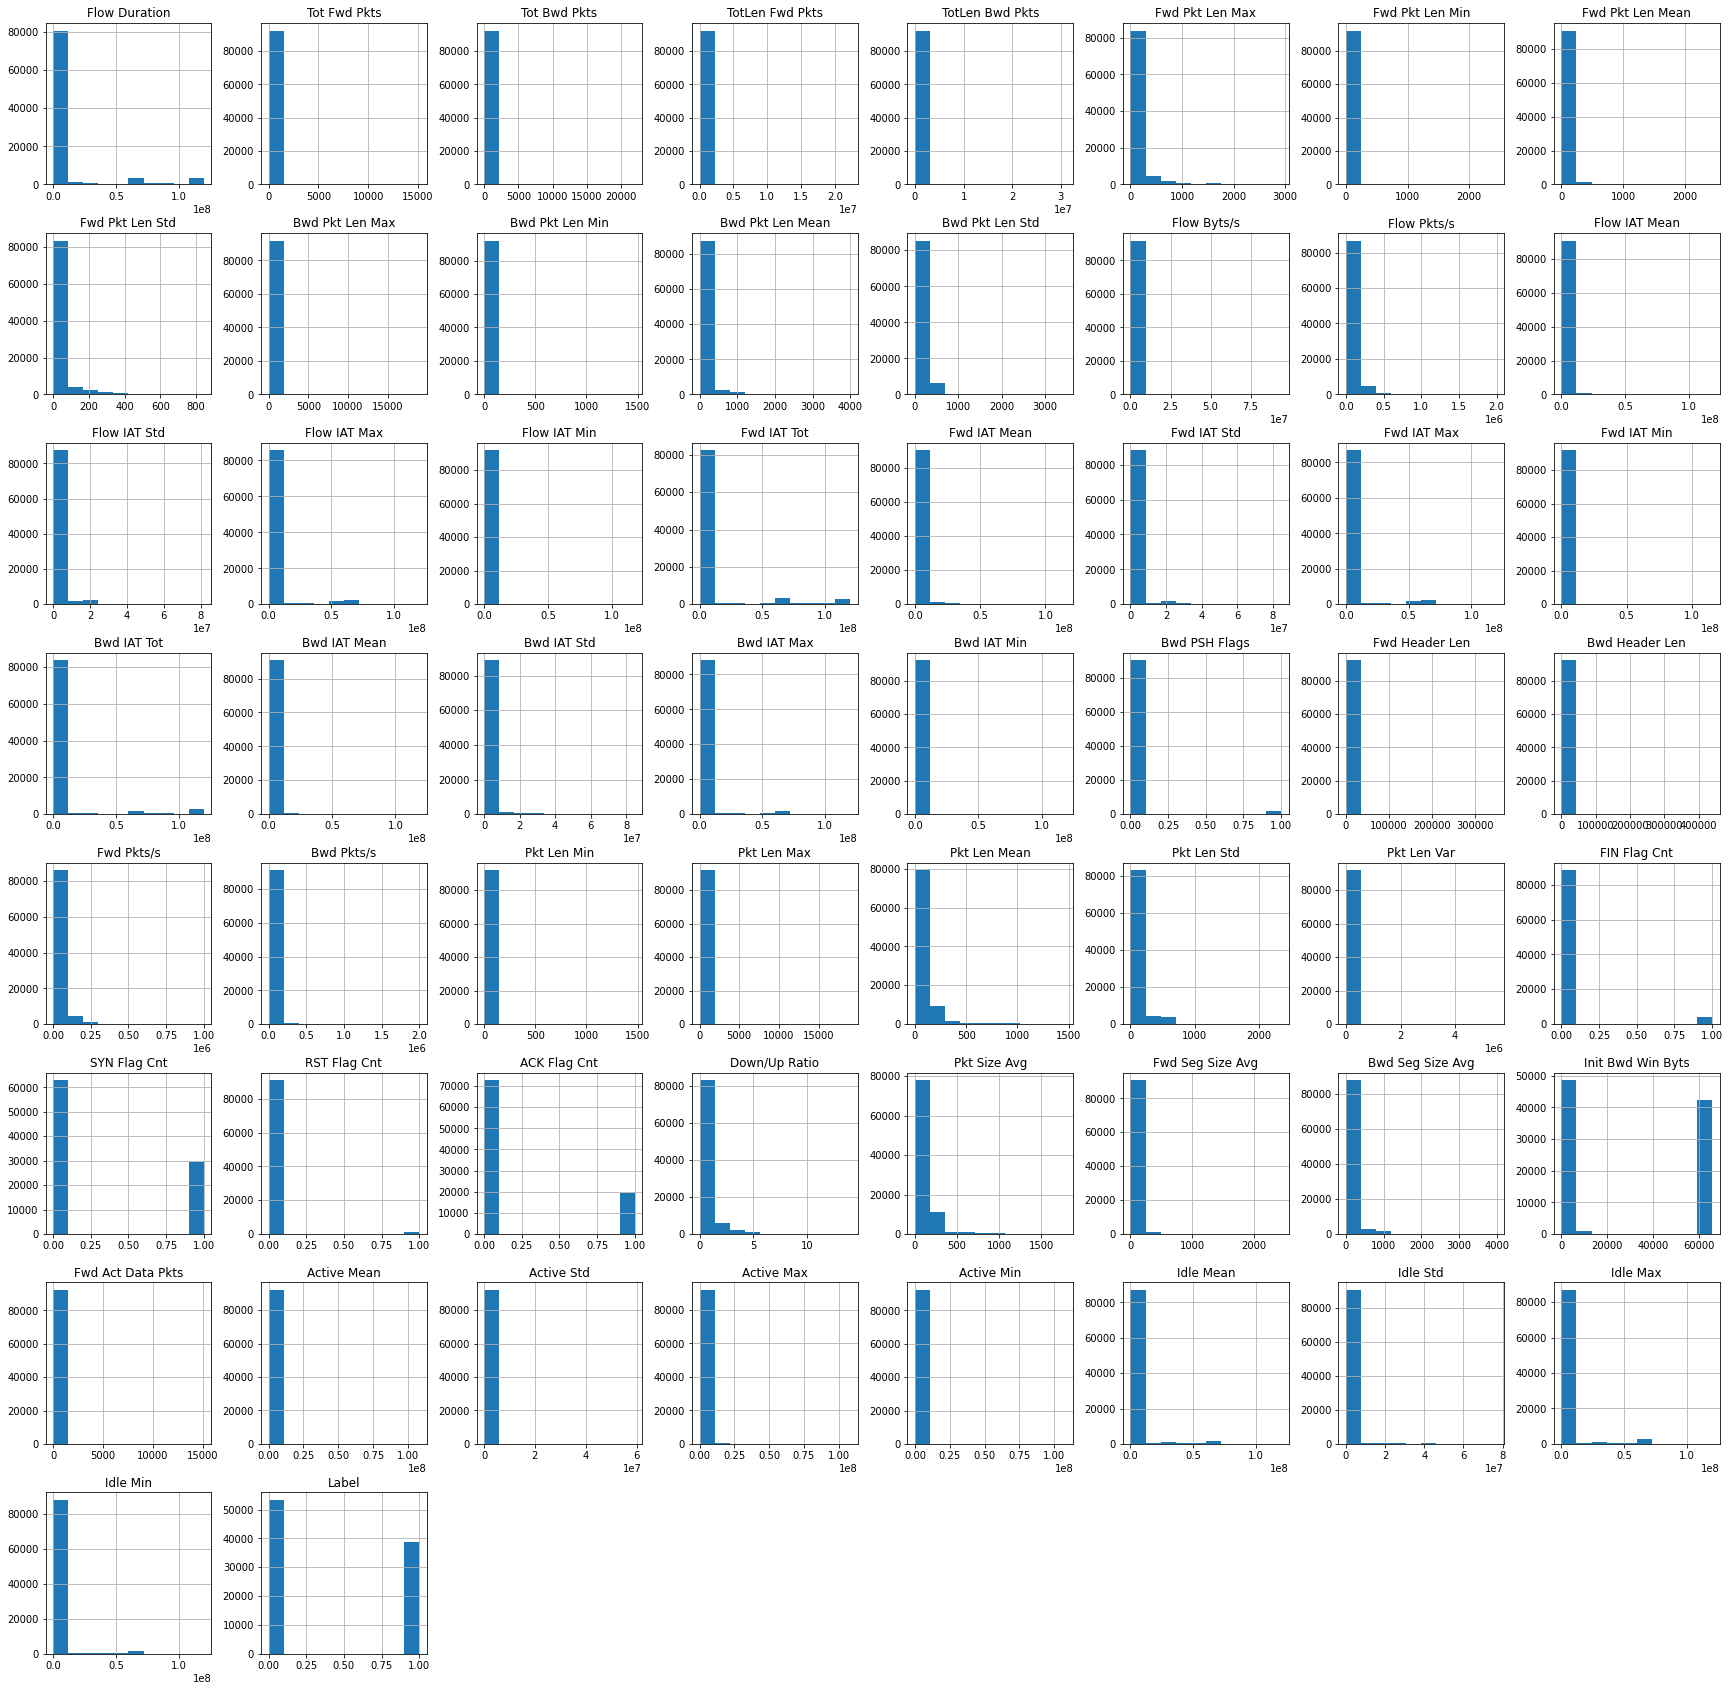

In [6]:
df.hist(figsize=(30,30));

In [7]:
for i, col_name in enumerate(df.columns):  
    print("{0:16}".format(col_name), " \tnunique = {0:6}".format(df[col_name].nunique()), 
        ", {0:5}% of ".format(round( (100*df[col_name].nunique() /len(df[col_name]) ), 2) )  ,
        "total = {0:9}".format(len(df[col_name])), "\tnull = {}".format(df[col_name].isnull().sum()) ,
        ",\t {}% of total".format(round( (100*(df[col_name].isnull().sum()) /len(df[col_name]) ), 2) ) )

Flow Duration     	nunique =  66387 , 71.99% of  total =     92212 	null = 0 ,	 0.0% of total
Tot Fwd Pkts      	nunique =    436 ,  0.47% of  total =     92212 	null = 0 ,	 0.0% of total
Tot Bwd Pkts      	nunique =    714 ,  0.77% of  total =     92212 	null = 0 ,	 0.0% of total
TotLen Fwd Pkts   	nunique =   3942 ,  4.27% of  total =     92212 	null = 0 ,	 0.0% of total
TotLen Bwd Pkts   	nunique =   6451 ,   7.0% of  total =     92212 	null = 0 ,	 0.0% of total
Fwd Pkt Len Max   	nunique =   1203 ,   1.3% of  total =     92212 	null = 0 ,	 0.0% of total
Fwd Pkt Len Min   	nunique =    129 ,  0.14% of  total =     92212 	null = 0 ,	 0.0% of total
Fwd Pkt Len Mean  	nunique =   6930 ,  7.52% of  total =     92212 	null = 0 ,	 0.0% of total
Fwd Pkt Len Std   	nunique =   8131 ,  8.82% of  total =     92212 	null = 0 ,	 0.0% of total
Bwd Pkt Len Max   	nunique =   1168 ,  1.27% of  total =     92212 	null = 0 ,	 0.0% of total
Bwd Pkt Len Min   	nunique =    130 ,  0.14% of  total =    

In [8]:
df.Label.value_counts()

0    53314
1    38898
Name: Label, dtype: int64

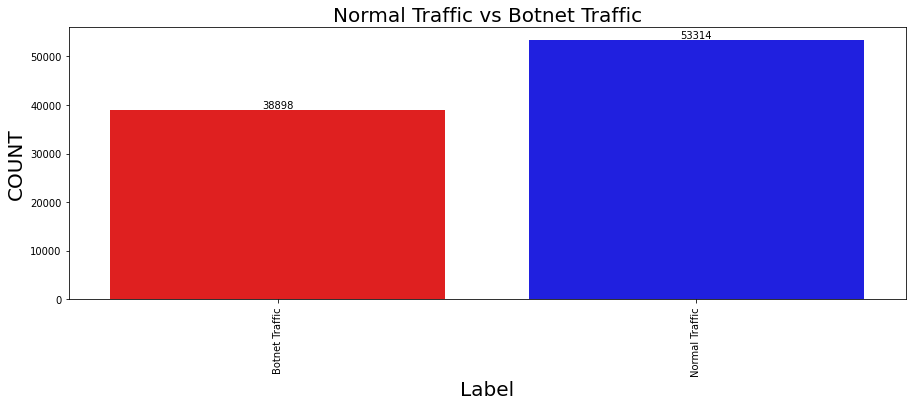

In [9]:
df_to_plot = df.copy() 
df_to_plot['Label'].replace([0, 1], ['Normal Traffic', 'Botnet Traffic'], inplace=True)
plt.figure(figsize = (15,5))
ax = sns.countplot(x="Label", data=df_to_plot, palette=["#FF0000","#0000FF"])
for i in ax.containers:
    ax.bar_label(i)
plt.title("Normal Traffic vs Botnet Traffic", fontsize=20)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Label", fontsize = 20)
plt.ylabel('COUNT', fontsize = 20);

In [10]:
# Look at some features for normal traffic

normal_df = df[df['Label'] == 0]
normal_df.describe()


,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Bwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,ACK Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Init Bwd Win Byts,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,5.331400e+04,53314.000000,53314.000000,5.331400e+04,5.331400e+04,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,5.331400e+04,53314.000000,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,53314.0
mean,1.183955e+07,8.998049,15.738624,5.184460e+03,1.175429e+04,88.015512,1.682954,18.315041,29.274102,260.323198,24.560303,111.027642,111.656817,7.331441e+03,370.124703,7.851891e+05,1.404864e+06,4.661144e+06,1.338390e+05,1.070050e+07,1.165268e+06,1.348256e+06,3.897543e+06,2.814305e+05,1.120063e+07,1.064623e+06,1.560921e+06,4.262027e+06,7.200713e+04,0.032543,189.407510,307.377274,126.940802,243.183901,24.461492,272.971002,86.624056,99.413556,33973.981039,0.013824,0.158964,0.018794,0.230033,0.479930,109.966460,18.315041,111.027642,22533.517932,5.365908,1.568118e+05,9.385848e+04,3.289065e+05,1.031014e+05,3.841496e+06,6.106216e+05,4.346262e+06,3.350085e+06,0.0
std,3.065518e+07,191.328376,233.664390,2.391167e+05,2.514014e+05,243.945402,12.427593,60.287267,82.711110,421.400484,23.094990,165.709169,172.516154,6.809005e+04,3326.808660,3.272066e+06,4.736714e+06,1.424134e+07,2.199474e+06,2.949688e+07,3.821770e+06,4.976667e+06,1.281768e+07,2.292200e+06,3.024896e+07,3.894384e+06,5.907718e+06,1.393013e+07,9.838717e+05,0.177439,4649.415508,4834.874009,1447.642622,2197.984350,22.209104,429.764652,120.430572,155.213974,90186.445541,0.116760,0.365646,0.135799,0.420858,0.773909,124.159611,60.287267,165.709169,31027.713812,181.658470,1.003680e+06,6.088809e+05,1.630029e+06,8.872057e+05,1.274905e+07,4.317842e+06,1.428394e+07,1.204194e+07,0.0
min,1.300000e+01,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.016949,1.300000e+01,0.000000e+00,1.300000e+01,-3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.008334,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,2.432650e+04,0.000000,2.000000,0.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,46.000000,0.000000,26.000000,11.313709,5.675620e+01,8.888362,2.297150e+04,0.000000e+00,2.425725e+04,7.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.885525e+04,1.866325e+04,0.000000e+00,1.884300e+04,1.170000e+02,0.000000,0.000000,16.000000,0.000000,6.281325,0.000000,46.000000,30.275000,9.237604,85.333333,0.000000,0.000000,0.000000,0.000000,0.000000,35.833333,0.000000,26.000000,-

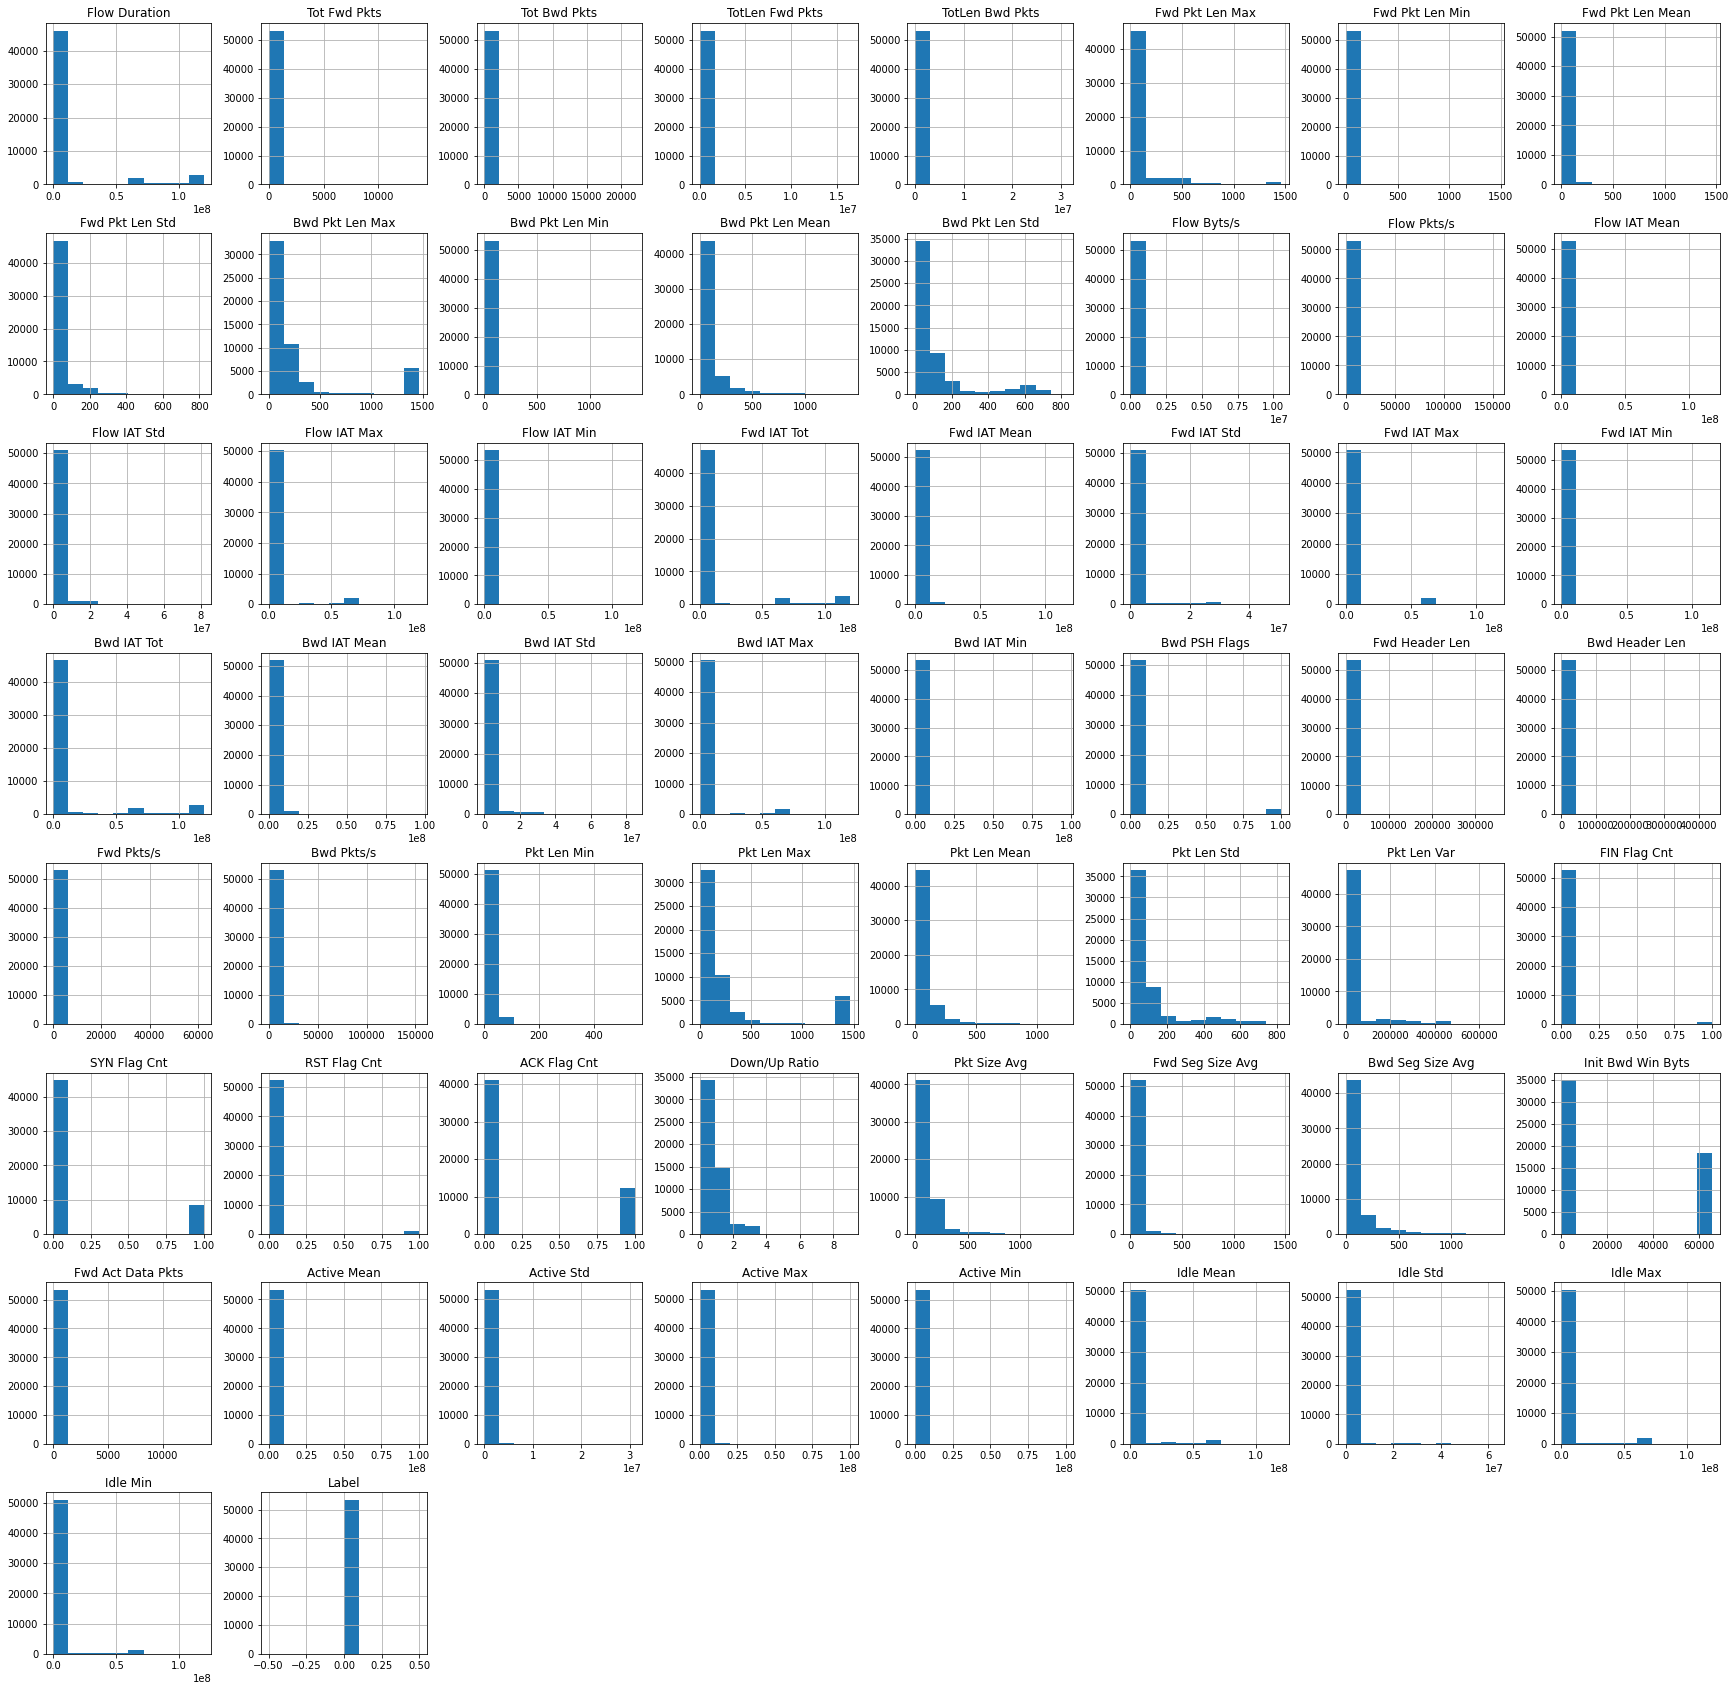

In [11]:
normal_df.hist(figsize=(30,30));

In [12]:
# Look at some features for botnet traffic

botnet_df = df[df['Label'] == 1]
botnet_df.describe()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Bwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,ACK Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Init Bwd Win Byts,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,3.889800e+04,38898.000000,38898.000000,3.889800e+04,3.889800e+04,38898.000000,38898.000000,38898.000000,38898.000000,38898.000000,38898.00000,38898.000000,38898.000000,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,38898.000000,38898.000000,38898.000000,38898.000000,3.889800e+04,38898.000000,38898.000000,38898.000000,38898.000000,3.889800e+04,38898.000000,38898.000000,38898.000000,38898.000000,38898.000000,38898.000000,38898.000000,38898.000000,38898.000000,38898.000000,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,38898.0
mean,9.156633e+06,13.609646,9.185331,6.171164e+03,8.097564e+03,63.507610,13.725050,29.360432,19.513610,169.153813,19.63286,83.543063,60.241999,2.597726e+05,6.228190e+04,1.827943e+06,2.102628e+06,6.334602e+06,7.565408e+05,7.620100e+06,1.794139e+06,2.084447e+06,5.412893e+06,5.468801e+05,2.674869e+06,5.931972e+05,7.099045e+05,1.654129e+06,1.550308e+05,0.005836,160.637359,111.537560,30887.457571,3.139444e+04,18.797342,184.108103,62.421409,57.319879,2.709924e+04,0.079567,0.535477,0.002339,0.184560,0.618849,72.541543,29.360432,83.543063,40208.546018,6.346265,8.165433e+05,5.573895e+04,8.763379e+05,7.724277e+05,4.046599e+06,3.262941e+05,4.364930e+06,3.807079e+06,1.0
std,2.112623e+07,311.173197,95.260839,3.394345e+05,1.326952e+05,202.203633,48.467214,93.998555,78.833138,589.421365,51.16400,230.747700,186.432076,2.641509e+06,1.385740e+05,6.837526e+06,4.984356e+06,1.495224e+07,6.522463e+06,1.812784e+07,6.181409e+06,5.577965e+06,1.386045e+07,5.403671e+06,1.294795e+07,3.695814e+06,4.299357e+06,8.593804e+06,2.392119e+06,0.076170,2492.162608,1015.767329,68796.279377,7.100075e+04,43.246587,599.859684,139.838450,154.318775,1.650327e+05,0.270625,0.498746,0.048312,0.387945,1.094561,149.841771,93.998555,230.747700,30620.569289,231.220137,1.954508e+06,8.435249e+05,2.346825e+06,1.848346e+06,1.090345e+07,3.081905e+06,1.193946e+07,1.054928e+07,0.0
min,1.000000e+00,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,1.736288e-02,1.000000e+00,0.000000e+00,1.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,8.333333e-03,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
25%,2.950000e+02,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,6.657411e-01,1.585000e+02,0.000000e+00,2.780000e+02,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,8.000000,24.000000,0.272058,1.109885e-01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

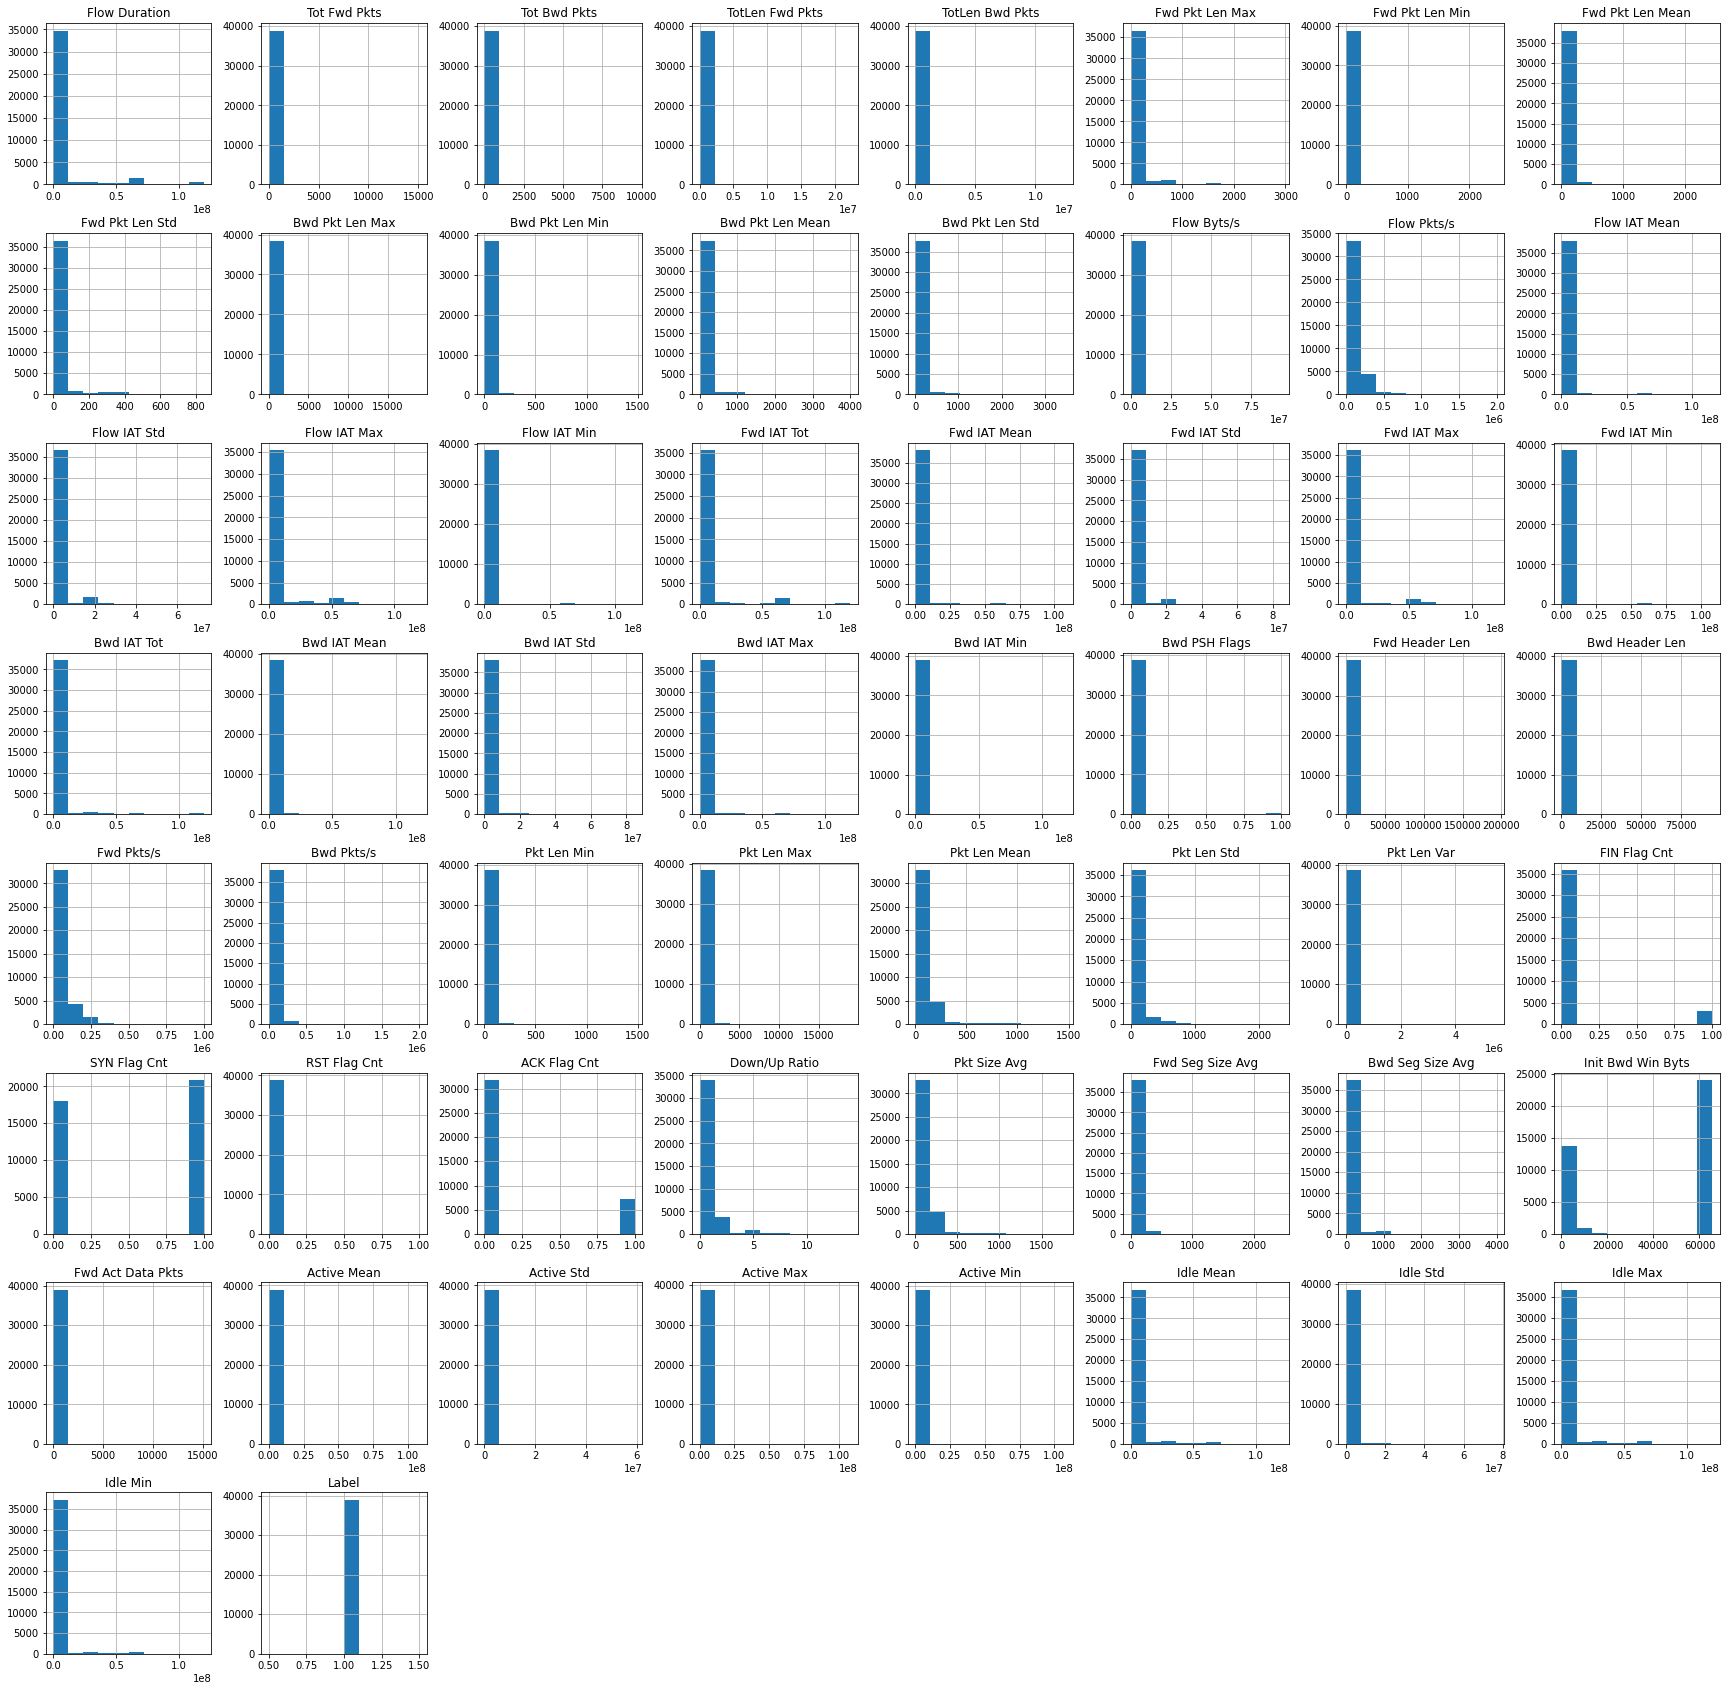

In [13]:
botnet_df.hist(figsize=(30,30));

### Data Cleaning

In [14]:
print(df.isnull().sum())

Flow Duration        0
Tot Fwd Pkts         0
Tot Bwd Pkts         0
TotLen Fwd Pkts      0
TotLen Bwd Pkts      0
Fwd Pkt Len Max      0
Fwd Pkt Len Min      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Max      0
Bwd Pkt Len Min      0
Bwd Pkt Len Mean     0
Bwd Pkt Len Std      0
Flow Byts/s          0
Flow Pkts/s          0
Flow IAT Mean        0
Flow IAT Std         0
Flow IAT Max         0
Flow IAT Min         0
Fwd IAT Tot          0
Fwd IAT Mean         0
Fwd IAT Std          0
Fwd IAT Max          0
Fwd IAT Min          0
Bwd IAT Tot          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Bwd PSH Flags        0
Fwd Header Len       0
Bwd Header Len       0
Fwd Pkts/s           0
Bwd Pkts/s           0
Pkt Len Min          0
Pkt Len Max          0
Pkt Len Mean         0
Pkt Len Std          0
Pkt Len Var          0
FIN Flag Cnt         0
SYN Flag Cnt         0
RST Flag Cnt         0
ACK Flag Cnt         0
Down/Up Rat

In [15]:
df[binary_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Bwd PSH Flags,92212.0,0.021277,0.144307,0.0,0.0,0.0,0.0,1.0
FIN Flag Cnt,92212.0,0.041556,0.199574,0.0,0.0,0.0,0.0,1.0
SYN Flag Cnt,92212.0,0.317789,0.465620,0.0,0.0,0.0,1.0,1.0
RST Flag Cnt,92212.0,0.011853,0.108225,0.0,0.0,0.0,0.0,1.0
ACK Flag Cnt,92212.0,0.210851,0.407915,0.0,0.0,0.0,0.0,1.0
Label,92212.0,0.421832,0.493855,0.0,0.0,0.0,1.0,1.0


In [16]:
min_max_scaler = MinMaxScaler().fit(df[numeric_cols])
df[numeric_cols] = min_max_scaler.transform(df[numeric_cols])

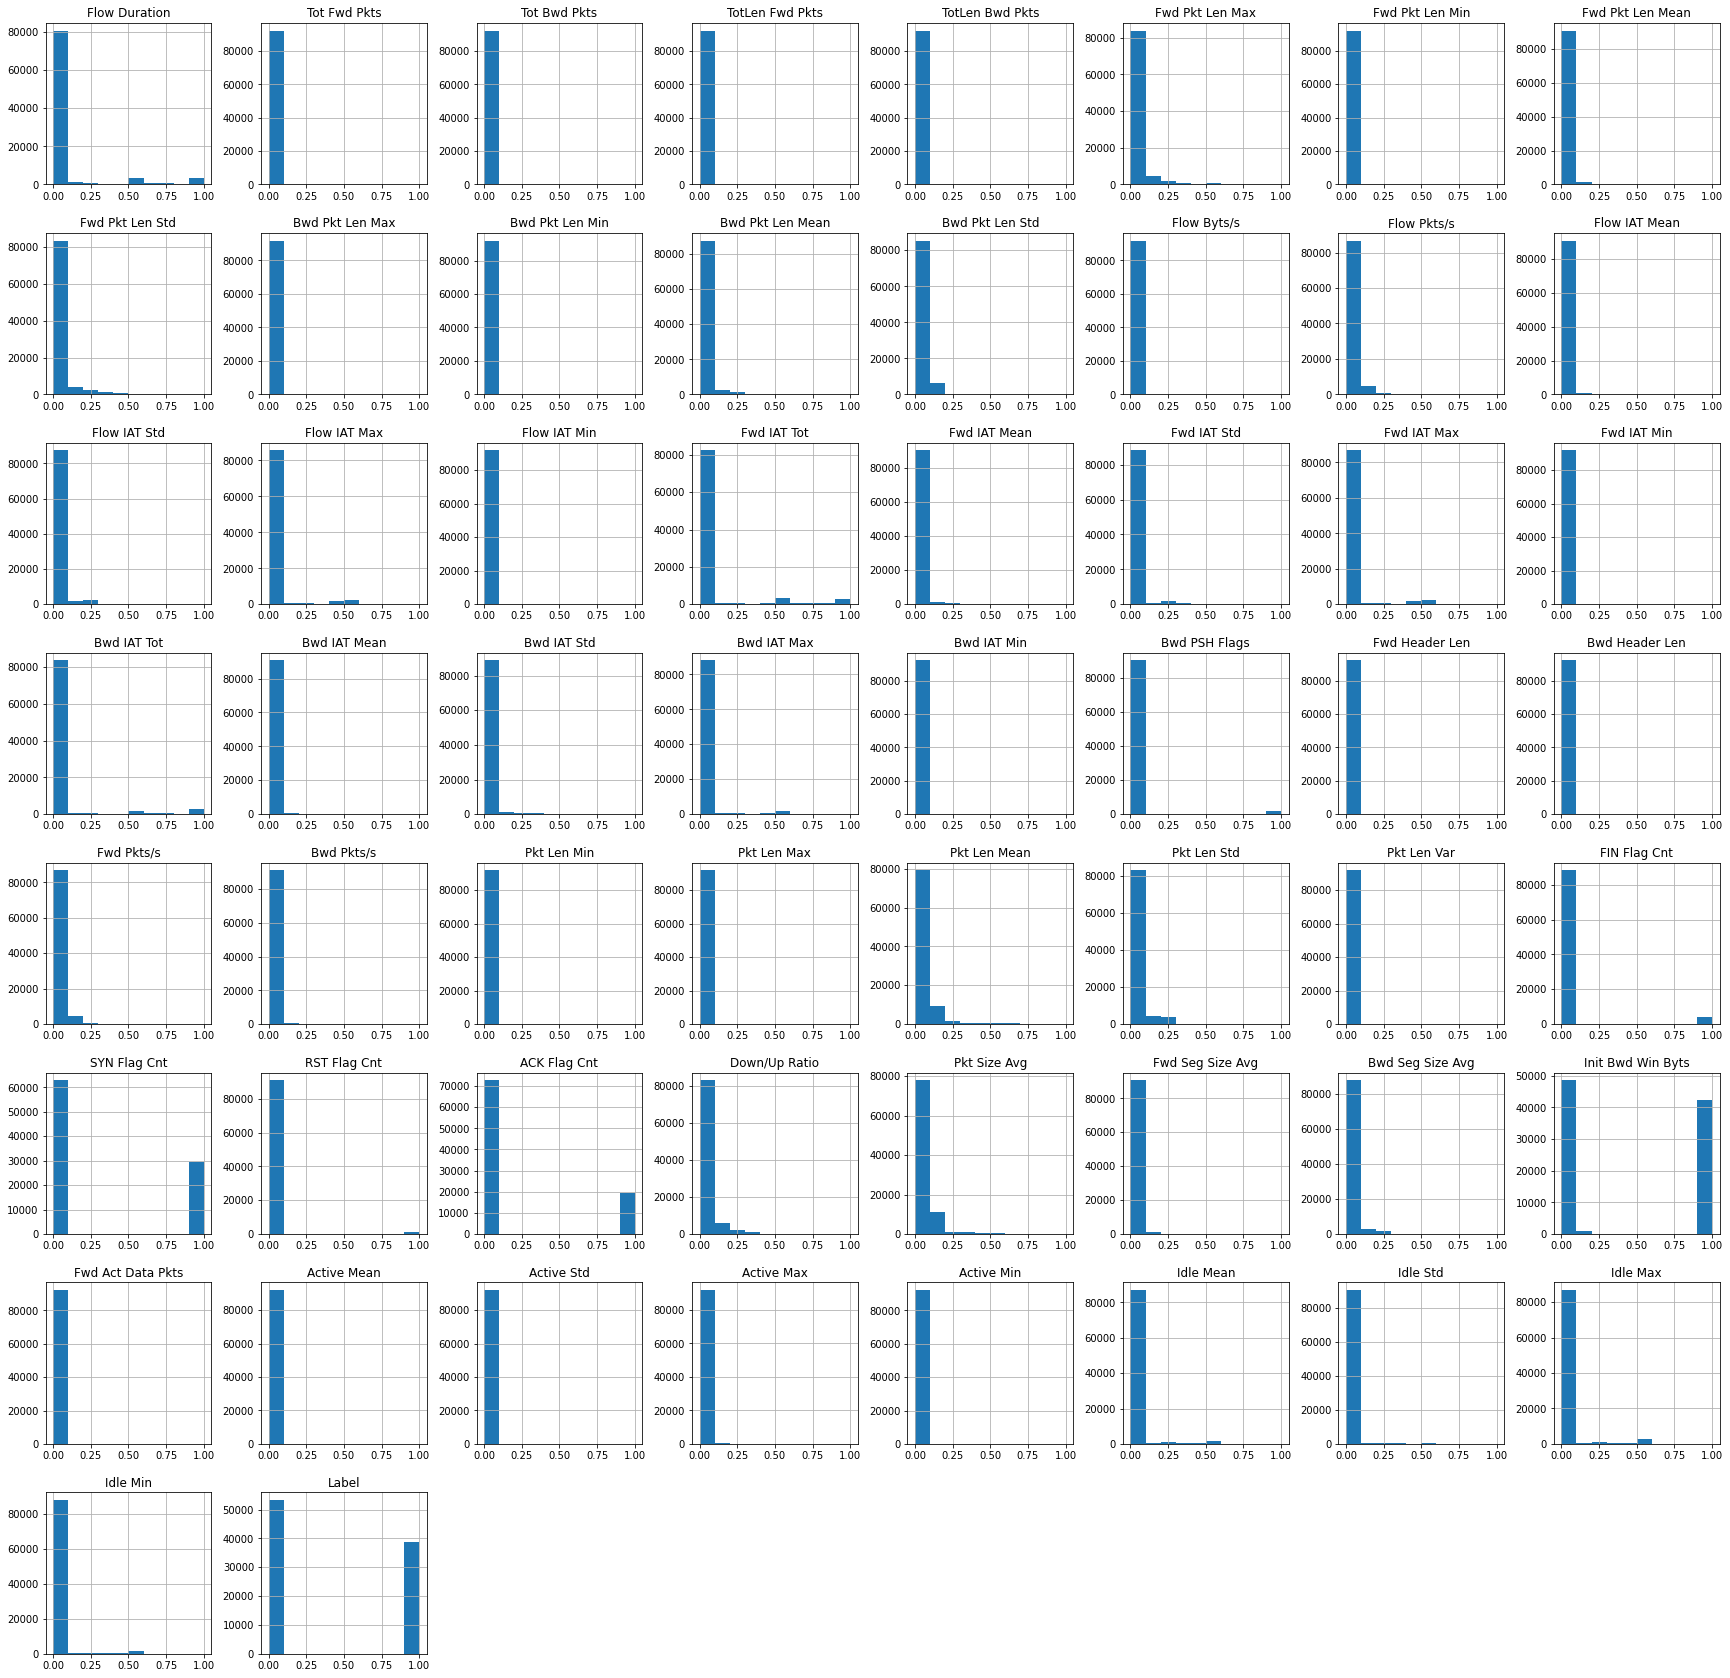

In [17]:
df.hist(figsize=(30,30));

In [18]:
# Calcola le correlazioni tra le features e la target_variable
df_to_corr = df
corr = df_to_corr.drop(columns=['Label']).corrwith(df_to_corr['Label'])

# Seleziona le features con una correlazione maggiore di una soglia scelta
threshold = 0.12 # Puoi scegliere una soglia a piacere
important_features = corr[corr > threshold].keys()

print(f'Most important features: {important_features.tolist()}')
print(f'Threshold: {threshold}')


Most important features: ['Fwd Pkt Len Min', 'Flow Pkts/s', 'Fwd Pkts/s', 'Bwd Pkts/s', 'FIN Flag Cnt', 'SYN Flag Cnt', 'Init Bwd Win Byts', 'Active Mean', 'Active Max', 'Active Min']
Threshold: 0.12


In [19]:
# Divide in input features and target variable

X = df.drop('Label', axis=1)
y = df['Label']

# Train a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X, y)

# Print feature importance scores
importance_scores = clf.feature_importances_

# Create a dataframe with feature names and scores
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importance_scores})

# Sort the dataframe by feature importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the names of the top n most important features
n = 10
top_n_features = feature_importances['feature'][:n]
print(f'Top {n} most important features: {top_n_features.tolist()}')

Top 10 most important features: ['Init Bwd Win Byts', 'Flow IAT Min', 'Bwd Header Len', 'Pkt Len Max', 'Down/Up Ratio', 'Pkt Len Mean', 'Bwd IAT Min', 'Pkt Len Var', 'Pkt Len Std', 'Flow IAT Std']


In [20]:
df_svd = df.drop('Label', axis=1)
# Esecuzione della SVD
U, s, VT = np.linalg.svd(df_svd)

# Selezione delle componenti principali
n_components = 10
U = U[:, :n_components]
s = s[:n_components]
VT = VT[:n_components, :]

# Mapping delle componenti principali
df_components = pd.DataFrame(VT.T, columns=range(1, n_components + 1))
df_components.index = df_svd.columns

top_features = df_components.abs().sum(axis=1).sort_values(ascending=False).head(10)
print("Le dieci features più importanti sono:")
for feature in top_features.index:
    print("- {}".format(feature))

: 

: 

Le 10 features più importanti sono:
Fwd Act Data Pkts
TotLen Fwd Pkts
Tot Fwd Pkts
TotLen Bwd Pkts
Fwd Header Len
Bwd IAT Min
Tot Bwd Pkts
Bwd Header Len
Fwd IAT Min
Flow Byts/s


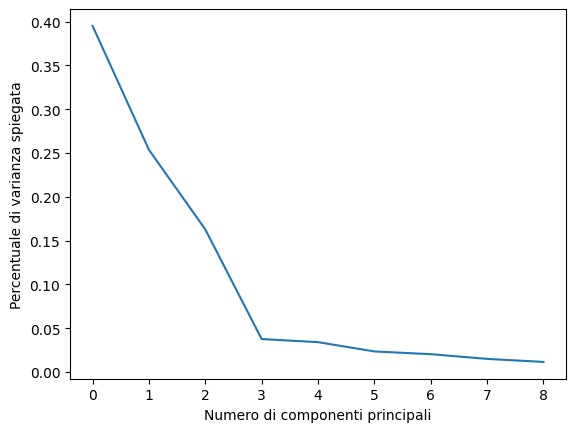

In [ ]:
# Creazione di un oggetto PCA
df_pca = df.drop('Label', axis=1)
pca = PCA(n_components=10)
pca.fit(df_pca)

# Estrazione delle caratteristiche selezionate
X_pca = pca.transform(df_pca)
# Calcola le feature importati dalla PCA
feature_importance = np.abs(pca.components_[0])

# Ordina le feature in base all'importanza
sorted_idx = np.argsort(feature_importance)

# Stampa le 10 features più importanti
print("Le 10 features più importanti sono:")
for i in range(10):
    print(df_pca.columns[sorted_idx[i]])

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Numero di componenti principali')
plt.ylabel('Percentuale di varianza spiegata')
plt.show()

### Splitting the dataset

In [ ]:
# split the dataset into train and test sets
train_x, test_x, train_y, test_y = train_test_split(df.drop("Label", axis=1), df["Label"], test_size=0.3, random_state=42)